# Word2Vec Model Training

## *Dataset References*
*I train the model with this two external dataset:*
-  https://www.kaggle.com/datasets/momo12341234/cyberbully-detection-dataset?resource=download 
- https://www.kaggle.com/datasets/sayankr007/cyber-bullying-data-for-multi-label-classification?select=final_hateXplain.csv

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import sys
import os
from collections import Counter
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils.text_preprocessing import preprocess_text 

In [2]:

df_cb = pd.read_csv("../dataset/word2vecTraining/cyberbullying_tweets.csv")
df_hate = pd.read_csv("../dataset/word2vecTraining/final_hateXplain.csv")

df_cb = df_cb[['tweet_text']].rename(columns={'tweet_text': 'text'}).dropna()
df_hate = df_hate[['comment']].rename(columns={'comment': 'text'}).dropna()

df_cb['text'] = df_cb['text'].apply(preprocess_text)
df_hate['text'] = df_hate['text'].apply(preprocess_text)

df_all = pd.concat([df_cb, df_hate], ignore_index=True)

sentences = df_all['text'].apply(str.split).tolist()

print(f"Training Word2Vec dataset length: {len(sentences)}")


Training Word2Vec dataset length: 67801


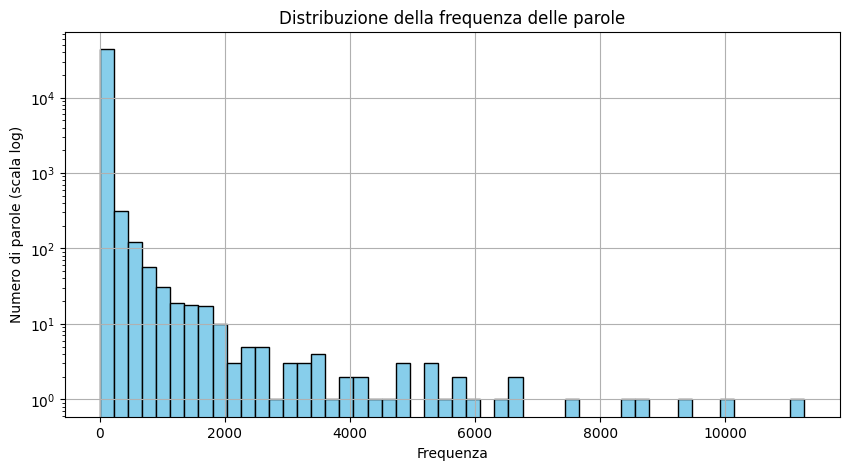

min_count = 1 → esclude 25924 parole su 44420 totali (58.4%)
min_count = 2 → esclude 31149 parole su 44420 totali (70.1%)
min_count = 5 → esclude 36093 parole su 44420 totali (81.3%)
min_count = 10 → esclude 38681 parole su 44420 totali (87.1%)


In [3]:
all_tokens = [word for sentence in sentences for word in sentence]

word_freq = Counter(all_tokens)

freq_values = list(word_freq.values())

plt.figure(figsize=(10, 5))
plt.hist(freq_values, bins=50, log=True, color="skyblue", edgecolor="black")
plt.title("Distribuzione della frequenza delle parole")
plt.xlabel("Frequenza")
plt.ylabel("Numero di parole (scala log)")
plt.grid(True)
plt.show()

vocab_size = len(word_freq)
for k in [1, 2, 5, 10]:
    rare = sum(1 for freq in freq_values if freq <= k)
    print(f"min_count = {k} → esclude {rare} parole su {vocab_size} totali "
          f"({rare / vocab_size:.1%})")


## Training Phase

In [4]:

w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=200,
    window=7,
    min_count=2, 
    sg=1,           
    workers=4, 
    epochs=10
)
w2v_model.save("../model/word2vec_model1.model")


## *Selection of Parameters for Word2Vec Training*

The following parameters were chosen to train Word2Vec on a domain-specific corpus related to cyberbullying, hate speech, and offensive content. The corpus includes approximately *70,000 preprocessed sentences* from multiple labeled datasets, resulting in a vocabulary of almost *45,000 unique words*.

* **`vector_size=200`**  
  *Provides a dense representation of each word, capturing semantic relationships while keeping the feature size manageable for downstream tasks such as classification.*

* **`window=7`**  
  *Captures the context of a word by looking at up to 5 words before and after it, which is effective for learning both local and thematic associations in social media language.*

* **`min_count=2`**  
  *Excludes rare words that appear only once in the entire corpus. This helps reduce noise without sacrificing useful information, as confirmed by an empirical analysis of word frequency distribution. This value prunes about 70.1% of words; using an higher value could raise significant words.*

* **`sg=1`**  
  *Enables the Skip-gram architecture, which performs better than CBOW on smaller or noisier corpora—ideal for social media and cyberbullying texts, where rare words and slang carry meaning.*

* **`epochs=10`**  
  *The model is trained over 10 full passes through the corpus, which provides sufficient learning depth given the size and nature of the data.*

This setup is optimized for generating semantically meaningful word embeddings tailored to the detection and analysis of harmful content in text-based social media data.